In [1]:
import math
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def vertex_weights(n_vert):

    ## sample weights for simplex
    exps = [-(torch.rand(1)).log().item() for _ in range(n_vert)]
    total = sum(exps)
    exps = [exp/total for exp in exps]

#     ## now assign vertex weights out
#     vert_weights = [0] * self.n_vert
#     for ii, vert in enumerate(self.simplicial_complex[simp_ind]):
#         vert_weights[vert] = exps[ii]

    return np.array(exps)


In [3]:
n_sample = 200

## Sample Simplexes

In [4]:
bias_verts = np.array([[0, 0, 100],
                     [0, 1, 0.],
                      [1., 0., 0.]])

bias_samples = np.zeros((n_sample, 3))

for ii in range(n_sample):
    weights = np.array(vertex_weights(3))
    bias_samples[ii, :] = bias_verts.dot(weights)
    
    
unit_verts = np.array([[0, 0, 1],
                      [0, 1, 0],
                      [1., 0., 0.]])

unit_samples = np.zeros((n_sample, 3))

for ii in range(n_sample):
    weights = np.array(vertex_weights(3))
    unit_samples[ii, :] = unit_verts.dot(weights)

## Plot

In [5]:
def plot_simplex(verts, samples, ax):
    n_vert = verts.shape[-1]
    for v1 in range(n_vert):
        for v2 in range(v1, n_vert):
            ax.plot([verts[0, v1], verts[0, v2]], [verts[1,v1], verts[1,v2]],
                   color='black', linewidth=2.)
            
    ax.scatter(samples[:, 0], samples[:, 1], color='steelblue', alpha=0.5)

In [6]:
def plot_simplex_3d(verts, samples, ax):
    n_vert = verts.shape[-1]
    for v1 in range(n_vert):
        for v2 in range(v1, n_vert):
            for v3 in range(v2, n_vert):
                ax.plot([verts[0, v1], verts[0, v2]], [verts[1,v1], verts[1,v2]],[verts[2,v1], verts[2,v2]],
                       color='black', linewidth=2.)
            
    ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], color='steelblue', alpha=0.5)

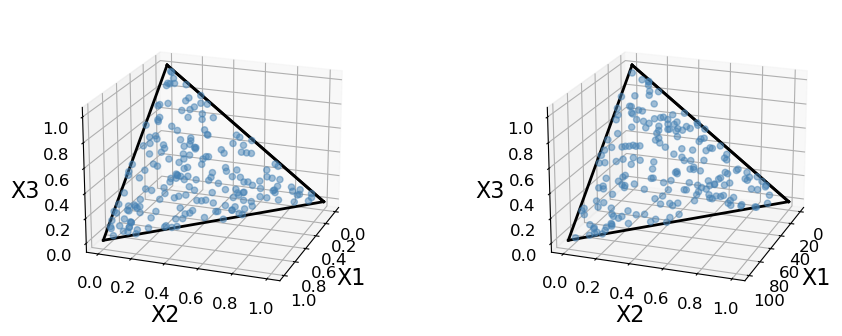

In [7]:
fs = 16

fig = plt.figure(figsize=(10, 5), dpi=100)
G = gridspec.GridSpec(1, 2, wspace=0.5)
ax1 = fig.add_subplot(G[0,:1], projection='3d')
plot_simplex_3d(unit_verts, unit_samples, ax1)

ax2 = fig.add_subplot(G[0, 1:], projection='3d')
plot_simplex_3d(bias_verts, bias_samples, ax2)

ax1.set_xlabel("X1", fontsize=fs)
ax1.set_ylabel("X2", fontsize=fs)
ax1.set_zlabel("X3", fontsize=fs)
ax1.tick_params('both', labelsize=fs-4)
ax1.auto_scale_xyz([0, 1], [0, 1], [0, 1])
ax1.view_init(20, 20)

ax2.set_xlabel("X1", fontsize=fs)
ax2.set_ylabel("X2", fontsize=fs)
ax2.set_zlabel("X3", fontsize=fs)
ax2.tick_params('both', labelsize=fs-4)
ax2.auto_scale_xyz([0, 100], [0, 1], [0, 1])
ax2.view_init(20, 20)
plt.savefig("./sample_bias.pdf", bbox_inches='tight')
plt.show();